In [10]:
import sys,os
import trimesh as tri
import numpy as np
import torch
import matplotlib.pyplot as plt

from utils import mesh_processing, lddmm_utils

In [2]:
root_path = "../datasets/COMA/"

idents = ['FaceTalk_170725_00137_TA', 'FaceTalk_170728_03272_TA', 'FaceTalk_170731_00024_TA', 'FaceTalk_170809_00138_TA',
          'FaceTalk_170811_03274_TA', 'FaceTalk_170811_03275_TA', 'FaceTalk_170904_00128_TA', 'FaceTalk_170904_03276_TA',
          'FaceTalk_170908_03277_TA', 'FaceTalk_170912_03278_TA', 'FaceTalk_170913_03279_TA', 'FaceTalk_170915_00223_TA']

exprs = ['bareteeth', 'cheeks_in', 'eyebrow', 'high_smile', 'lips_back', 'lips_up',
         'mouth_down', 'mouth_extreme', 'mouth_middle', 'mouth_open', 'mouth_side', 'mouth_up']

In [99]:
path_id1_expr1 = root_path + idents[0] + '/' + exprs[0]
list_id1_expr1 = os.listdir(path_id1_expr1)
list_id1_expr1.sort()

mesh = tri.load(path_id1_expr1 + '/' + list_id1_expr1[len(list_id1_expr1)//2])
V = mesh.vertices

In [100]:
lines = mesh.vertices[mesh.edges_unique]

In [101]:
unique_edges = mesh.edges[tri.grouping.group_rows(mesh.edges_sorted, require_count=1)]

In [109]:
boundary_V = np.vstack((V[unique_edges[:,0]], V[unique_edges[:,1]]))

In [110]:
t = boundary_V

In [111]:
t.shape

(124, 3)

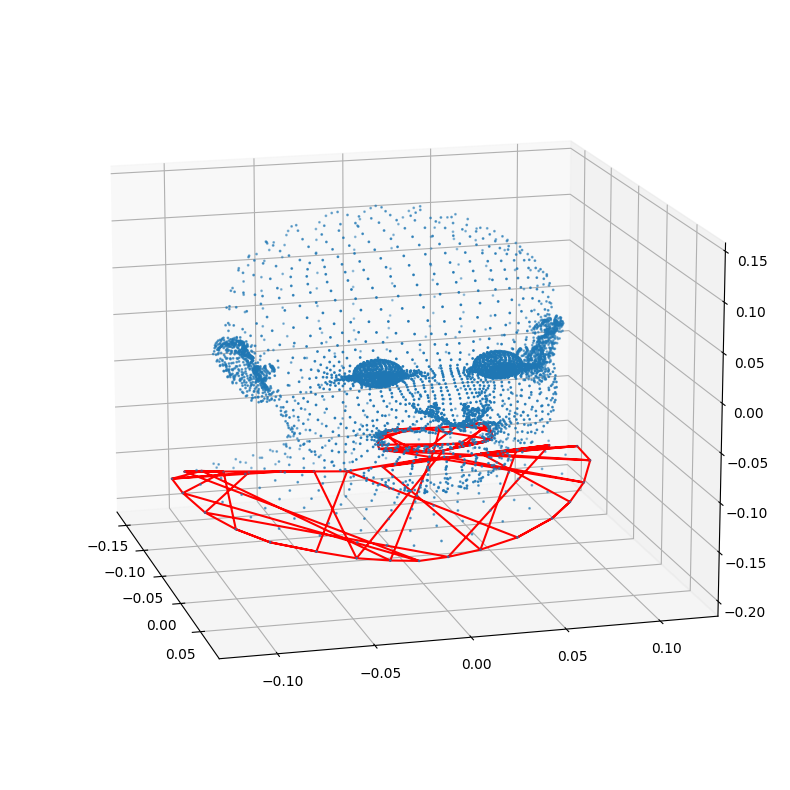

In [112]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(V[:,2], V[:,0], V[:,1], s=1)
ax.plot3D(t[:,2], t[:,0], t[:,1], c='r')

ax.view_init(15, -15, 0)
plt.show()

In [113]:
t

array([[ 0.02960566, -0.05240424,  0.02725421],
       [ 0.02939775, -0.04920344,  0.02665546],
       [ 0.02863839, -0.04568496,  0.0257494 ],
       [ 0.0093825 , -0.03698498,  0.03230375],
       [ 0.01598775, -0.03797243,  0.02991587],
       [ 0.02218775, -0.03814607,  0.02829942],
       [ 0.02781076, -0.04292066,  0.02526287],
       [ 0.02557388, -0.03949241,  0.02643058],
       [ 0.02712381, -0.04103188,  0.02517345],
       [ 0.01478354, -0.0622248 ,  0.02469008],
       [ 0.00877968, -0.06372285,  0.02427671],
       [ 0.0289128 , -0.05580843,  0.02732933],
       [ 0.02076042, -0.05997812,  0.02533094],
       [ 0.02619713, -0.0582128 ,  0.02654849],
       [-0.03053967, -0.05705504,  0.02748524],
       [-0.03138778, -0.05272841,  0.02774549],
       [-0.0309919 , -0.04857548,  0.02766486],
       [-0.01651408, -0.03591743,  0.03313838],
       [-0.02285716, -0.03621117,  0.03194141],
       [-0.0264313 , -0.03797993,  0.02990146],
       [-0.02998835, -0.04450233,  0.027